In [67]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
# load in raw data
pwd_raw_data = '/Users/Varishth/Desktop/Springboard_Projects/capstone_two/data/raw_fisc_data.csv'
raw_df = pd.read_csv(pwd_raw_data)
raw_df.columns

Index(['year', 'city_name', 'city_types', 'id_city', 'city_population', 'cpi',
       'rev_total_city', 'rev_general_city', 'intergovt_rev_city',
       'igr_federal_city',
       ...
       'cash_other_offsets', 'cash_other_bonds', 'cash_other_other',
       'county_name', 'id_county', 'county_population',
       'relationship_city_school', 'enrollment', 'districts_in_city',
       'consolidated_govt'],
      dtype='object', length=663)

In [4]:
# Aside from FiSC (Fiscally Standardized Cities) this data set is made up of 
# city-level, county-level, district school-level and special district-level data.
# Since we will be only concerned with the FiSC data, we can filter out the other levels.
df = raw_df.drop(raw_df.filter(regex=r'(_city|_cnty|_schl|_spec)').columns, axis=1)
col = df.columns
print(col)

Index(['year', 'city_name', 'city_types', 'city_population', 'cpi',
       'rev_total', 'rev_general', 'intergovt_rev', 'igr_federal', 'igr_state',
       ...
       'cash_empl_retire', 'cash_other', 'cash_other_offsets',
       'cash_other_bonds', 'cash_other_other', 'county_name', 'id_county',
       'county_population', 'enrollment', 'consolidated_govt'],
      dtype='object', length=139)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Columns: 139 entries, year to consolidated_govt
dtypes: float64(134), int64(2), object(3)
memory usage: 9.5+ MB


In [13]:
df[col[1]].blank()

AttributeError: 'Series' object has no attribute 'blank'

In [124]:
for i in range(len(col)):
    print(col[i], " :", sum(df[col[i]].isnull()))

year  : 0
city_name  : 0
city_types  : 0
city_population  : 0
cpi  : 0
rev_total  : 0
rev_general  : 0
intergovt_rev  : 0
igr_federal  : 0
igr_state  : 0
own_source_rev  : 0
taxes  : 0
tax_property  : 0
tax_sales_grossrec  : 0
tax_sales_general  : 0
tax_sales_selectiv  : 0
tax_sales_motofuel  : 0
tax_sales_alcohol  : 0
tax_sales_tobacco  : 0
tax_sales_utility  : 0
tax_sales_other  : 0
tax_income_indiv  : 0
tax_income_corp  : 0
tax_motor_vehicle  : 0
tax_other  : 0
charges_misc_rev  : 0
charges  : 0
chg_educ  : 0
chg_higher_ed  : 0
chg_school_lunch  : 0
chg_hospitals  : 0
chg_highways  : 0
chg_air_transit  : 0
chg_parking  : 0
chg_seaport  : 0
chg_nat_resources  : 0
chg_parks_rec  : 0
chg_hous_commdev  : 0
chg_sewers  : 0
chg_waste_mgmt  : 0
chg_other  : 0
misc_general_rev  : 0
misc_interest  : 0
misc_fines_fees  : 0
misc_property_sale  : 0
misc_other  : 0
rev_utility  : 0
rev_utility_water  : 0
rev_utility_elec  : 0
rev_utility_gas  : 0
rev_utility_transit  : 0
rev_liquor_store  : 0
re

From the above search for null values, only 5 out of 139 fields had them: "county_name", "id_county", "county_population", enrollment" and "consolidated_govt". Upon cross-checking the origin of the database and description of the field list, these exact 5 fields were not listed as intended fields for the report. Therefore it can be concluded that these fields should not be present in the database and were likely erroneously entered. For this reason, we can exclude these fields from our study

In [14]:
df_v2 = raw_df.drop(["county_name", "id_county", "county_population", "enrollment", "consolidated_govt"], axis=1)

In [61]:
col_v2 = df_v2.columns
for i in range(len(col_v2)):
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print(col_v2[i])
    print(df_v2[[col[0]]].info())

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
year
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    8938 non-null   int64
dtypes: int64(1)
memory usage: 70.0 KB
None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
city_name
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    8938 non-null   int64
dtypes: int64(1)
memory usage: 70.0 KB
None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
city_types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    8938 non-null   int64
dtypes: int64(1)
memory usage: 70.0 KB
None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
admin_financial_city
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    8938 non-null   int64
dtypes: int64(1)
memory usage: 70.0 KB
None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
admin_judicial_city
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    8938 non-null   int64
dtypes: int64(1)
memory usage: 70.0 KB
None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
public_buildings_city
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    8938 non-null   int64
dtypes: int64(1)
memory usage: 70.0 KB
None

None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
chg_school_lunch_cnty
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    8938 non-null   int64
dtypes: int64(1)
memory usage: 70.0 KB
None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
chg_hospitals_cnty
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    8938 non-null   int64
dtypes: int64(1)
memory usage: 70.0 KB
None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
chg_highways_cnty
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    8938 non-null   int64
dtypes: int64(1)
memory usage: 70.0 KB
None
~~~

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    8938 non-null   int64
dtypes: int64(1)
memory usage: 70.0 KB
None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
spend_debtinterest_cnty
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    8938 non-null   int64
dtypes: int64(1)
memory usage: 70.0 KB
None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
spend_insurance_cnty
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    8938 non-null   int64
dtypes: int64(1)
memory usage: 70.0 KB
None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
salaries_wages_cnty
<c

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    8938 non-null   int64
dtypes: int64(1)
memory usage: 70.0 KB
None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
rev_liquor_store_schl
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    8938 non-null   int64
dtypes: int64(1)
memory usage: 70.0 KB
None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
rev_empl_retire_tr_schl
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    8938 non-null   int64
dtypes: int64(1)
memory usage: 70.0 KB
None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
spending_direct_schl


None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
debt_outstanding_schl
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    8938 non-null   int64
dtypes: int64(1)
memory usage: 70.0 KB
None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
debt_short_term_schl
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    8938 non-null   int64
dtypes: int64(1)
memory usage: 70.0 KB
None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
debt_long_term_schl
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    8938 non-null   int64
dtypes: int64(1)
memory usage: 70.0 KB
None

None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
education_services_spec
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    8938 non-null   int64
dtypes: int64(1)
memory usage: 70.0 KB
None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
education_spec
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    8938 non-null   int64
dtypes: int64(1)
memory usage: 70.0 KB
None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
educ_higher_spec
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    8938 non-null   int64
dtypes: int64(1)
memory usage: 70.0 KB
None
~~~~~~

None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
capital_other_gen_spec
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    8938 non-null   int64
dtypes: int64(1)
memory usage: 70.0 KB
None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
capital_utility_spec
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    8938 non-null   int64
dtypes: int64(1)
memory usage: 70.0 KB
None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
debt_outstanding_spec
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    8938 non-null   int64
dtypes: int64(1)
memory usage: 70.0 KB
N

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    8938 non-null   int64
dtypes: int64(1)
memory usage: 70.0 KB
None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
rev_utility_gas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    8938 non-null   int64
dtypes: int64(1)
memory usage: 70.0 KB
None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
rev_utility_transit
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    8938 non-null   int64
dtypes: int64(1)
memory usage: 70.0 KB
None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
rev_liquor_store
<class 'pandas

None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
capital_other_gen
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    8938 non-null   int64
dtypes: int64(1)
memory usage: 70.0 KB
None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
capital_utility
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    8938 non-null   int64
dtypes: int64(1)
memory usage: 70.0 KB
None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
debt_outstanding
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    8938 non-null   int64
dtypes: int64(1)
memory usage: 70.0 KB
None
~~~~~~~~~~~

In [94]:
df_v2[df_v2["city_name"]=="NY: New York"]

,year,city_name,city_types,id_city,city_population,cpi,rev_total_city,rev_general_city,intergovt_rev_city,igr_federal_city,...,debt_issued,debt_retired,cash_holdings,cash_empl_retire,cash_other,cash_other_offsets,cash_other_bonds,cash_other_other,relationship_city_school,districts_in_city
5699,1977,NY: New York,core,332031001,7427800,4.044885,8661.77,7794.18,3688.00,510.73,...,1242.26,726.21,7166.71,5400.13,1766.58,741.75,161.46,863.37,4.0,NaN
5700,1978,NY: New York,core,332031001,7300700,3.759509,8212.89,7364.35,3400.98,571.87,...,892.38,652.49,7578.78,5488.09,2090.69,1070.26,176.10,844.33,4.0,NaN
5701,1979,NY: New York,core,332031001,7178900,3.376308,7602.88,6698.24,3011.15,516.71,...,754.32,2066.76,7633.98,5479.86,2154.12,1245.21,174.16,734.74,4.0,NaN
5702,1980,NY: New York,core,332031001,7102100,2.974757,7437.13,6534.30,2868.44,530.47,...,228.71,624.12,7501.80,5447.55,2054.25,1246.03,166.76,641.46,4.0,NaN
5703,1981,NY: New York,core,332031001,7071639,2.696590,7343.48,6374.78,2670.26,442.64,...,413.25,465.49,7118.06,5489.87,1628.19,836.22,174.23,617.74,4.0,NaN
5704,1982,NY: New York,core,332031001,7089241,2.540104,7118.81,6340.89,2609.82,351.21,...,511.46,359.14,7299.06,5674.55,1624.52,822.56,231.93,570.03,4.0,NaN
5705,1983,NY: New York,core,332031001,7109105,2.461044,7791.08,6655.67,2757.27,451.19,...,636.54,380.24,8231.50,6364.22,1867.28,889.57,321.66,656.05,4.0,NaN
5706,1984,NY: New York,core,332031001,7181224,2.359191,7794.91,6789.31,2742.56,492.65,...,617.56,428.92,8412.64,6566.59,1846.04,933.18,258.15,654.71,4.0,NaN
5707,1985,NY: New York,core,332031001,7234514,2.278067,8543.09,7236.60,2913.99,484.89,...,783.96,562.49,9095.15,7165.86,1929.29,959.26,303.01,667.01,4.0,NaN
5708,1986,NY: New York,core,332031001,7274054,2.236496,9002.53,7444.94,2920.03,406.74,...,1278.05,403.41,10550.24,8227.54,2322.69,1129.11,416.00,777.59,4.0,NaN


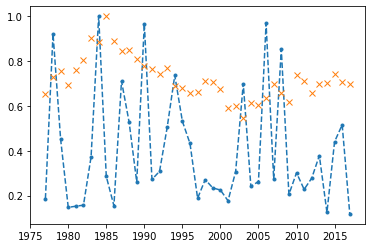

In [112]:
_ = plt.plot(df_v2[df_v2["city_name"]=="AK: Anchorage"].year, 
             df_v2[df_v2["city_name"]=="AK: Anchorage"].debt_retired.div(
             df_v2[df_v2["city_name"]=="AK: Anchorage"].debt_retired.max()),
             marker=".", linestyle="--")
_ = plt.plot(df_v2[df_v2["city_name"]=="AK: Anchorage"].year, 
             df_v2[df_v2["city_name"]=="AK: Anchorage"].rev_total_city.div(
             df_v2[df_v2["city_name"]=="AK: Anchorage"].rev_total_city.max()),
             marker="x", linestyle="None")

In [106]:
df_v2[df_v2["city_name"]=="AK: Anchorage"].debt_retired.div(1)

0      372.71
1     1845.05
2      901.94
3      294.31
4      305.03
5      313.96
6      745.82
7     2001.16
8      570.58
9      309.21
10    1422.02
11    1055.43
12     521.61
13    1935.49
14     544.22
15     616.33
16    1008.21
17    1472.75
18    1063.23
19     865.31
20     375.91
21     542.18
22     468.06
23     449.14
24     353.22
25     614.15
26    1398.97
27     482.96
28     525.02
29    1937.71
30     548.67
31    1705.89
32     410.06
33     603.10
34     455.18
35     555.56
36     757.17
37     249.39
38     880.61
39    1031.64
40     236.05
Name: debt_retired, dtype: float64

In [121]:
df_v2[["districts_in_city"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8938 entries, 0 to 8937
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   districts_in_city  6919 non-null   float64
dtypes: float64(1)
memory usage: 70.0 KB
